In [70]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score

# 1. Load dataset
df = pd.read_csv("ALL_I40_crash_data_updated.csv")

# 2. Define new binary target: Injurious (1) vs Property Damage (0)
df = df[df["Crash Type"].notnull()]
df["Injurious"] = df["Crash Type"].str.lower().apply(
    lambda x: 1 if "injury" in x or "fatal" in x or "serious injury" in x else 0
)

# 3. Use only tagged geospatial features
geo_features = [
    'Presence of guardrails',
    'Cable barriers',
    'Rumble strips',
    'Pavement condition',
    'Proximity to highway entrances and exits',
    'Urban vs. rural environment',
    'Surrounding natural features',
    'Number of lanes',
    'Shoulder type and width',
    'Posted speed limit',
    'Presence and type of median or divider',
    'Lane markings and signage visibility',
    'Nighttime lighting and visibility'
]

df = df.dropna(subset=geo_features)

X = df[geo_features]
y = df["Injurious"]

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 5. Define model and grid search parameters
class_weights = [1, 3.65]  # Try 3.655x more weight for class 1
cat_model = CatBoostClassifier(
    cat_features=list(range(X.shape[1])),
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

param_grid = {
    "depth": [4, 5, 6],
    "learning_rate": [0.01, 0.05],
    "iterations": [100, 200],
    "l2_leaf_reg": [1, 3, 5]
}

# 6. Define recall scorer for class 1
scorer = make_scorer(recall_score, pos_label=1)

# 7. Stratified cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 8. GridSearchCV with stratified CV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1
)

# 9. Train
grid_search.fit(X_train, y_train)

# 10. Evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Save model
best_model.save_model("catboost_best_injurious_model.cbm")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

Confusion Matrix:
 [[ 86 214]
 [ 24  58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.29      0.42       300
           1       0.21      0.71      0.33        82

    accuracy                           0.38       382
   macro avg       0.50      0.50      0.37       382
weighted avg       0.66      0.38      0.40       382



In [64]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score

# 1. Load dataset
df = pd.read_csv("ALL_I40_crash_data_updated.csv")

# 2. Define new binary target: Injurious (1) vs Property Damage (0)
df = df[df["Crash Type"].notnull()]
df["Injurious"] = df["Crash Type"].str.lower().apply(
    lambda x: 1 if "fatal" in x or "serious injury" in x else 0
)

# 3. Use only tagged geospatial features
geo_features = [
    'Presence of guardrails',
    'Cable barriers',
    'Rumble strips',
    'Pavement condition',
    'Proximity to highway entrances and exits',
    'Urban vs. rural environment',
    'Surrounding natural features',
    'Number of lanes',
    'Shoulder type and width',
    'Posted speed limit',
    'Presence and type of median or divider',
    'Lane markings and signage visibility',
    'Nighttime lighting and visibility'
]

df = df.dropna(subset=geo_features)

X = df[geo_features]
y = df["Injurious"]

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 5. Define model and grid search parameters
class_weights = [1, 23]  # Try 3.655x more weight for class 1
cat_model = CatBoostClassifier(
    cat_features=list(range(X.shape[1])),
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

param_grid = {
    "depth": [4, 5, 6],
    "learning_rate": [0.01, 0.05],
    "iterations": [100, 200],
    "l2_leaf_reg": [1, 3, 5]
}

# 6. Define recall scorer for class 1
scorer = make_scorer(recall_score, pos_label=1)

# 7. Stratified cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 8. GridSearchCV with stratified CV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1
)

# 9. Train
grid_search.fit(X_train, y_train)

# 10. Evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Save model
best_model.save_model("catboost_best_injurious_model.cbm")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

Confusion Matrix:
 [[181 185]
 [  5  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.49      0.66       366
           1       0.06      0.69      0.10        16

    accuracy                           0.50       382
   macro avg       0.51      0.59      0.38       382
weighted avg       0.93      0.50      0.63       382



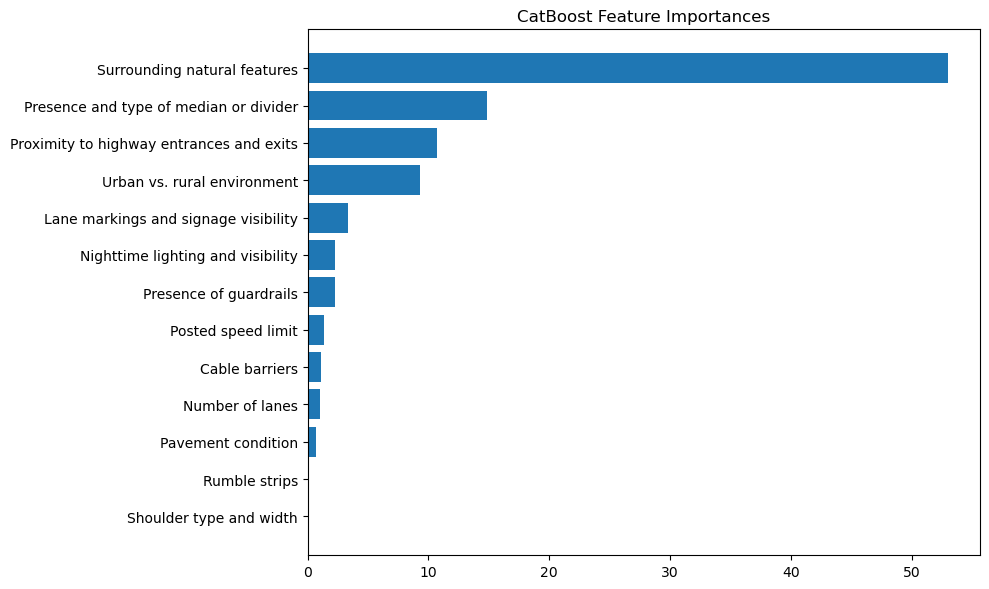

In [72]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
import matplotlib.pyplot as plt


# Get feature importances
importances = best_model.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat_features))
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.title("CatBoost Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

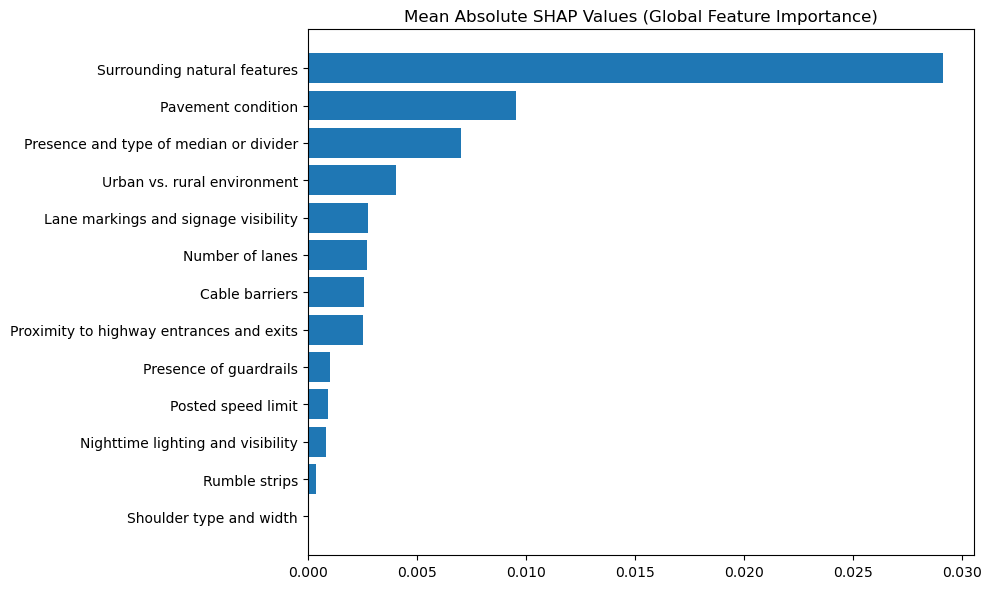

In [76]:
shap_values = best_model.get_feature_importance(type="ShapValues", data=Pool(X, y, cat_features=cat_features))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exclude the last column (expected value)
mean_abs_shap = np.abs(shap_values[:, :-1]).mean(axis=0)

shap_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean |SHAP|': mean_abs_shap
}).sort_values(by='Mean |SHAP|', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature'], shap_df['Mean |SHAP|'])
plt.title("Mean Absolute SHAP Values (Global Feature Importance)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

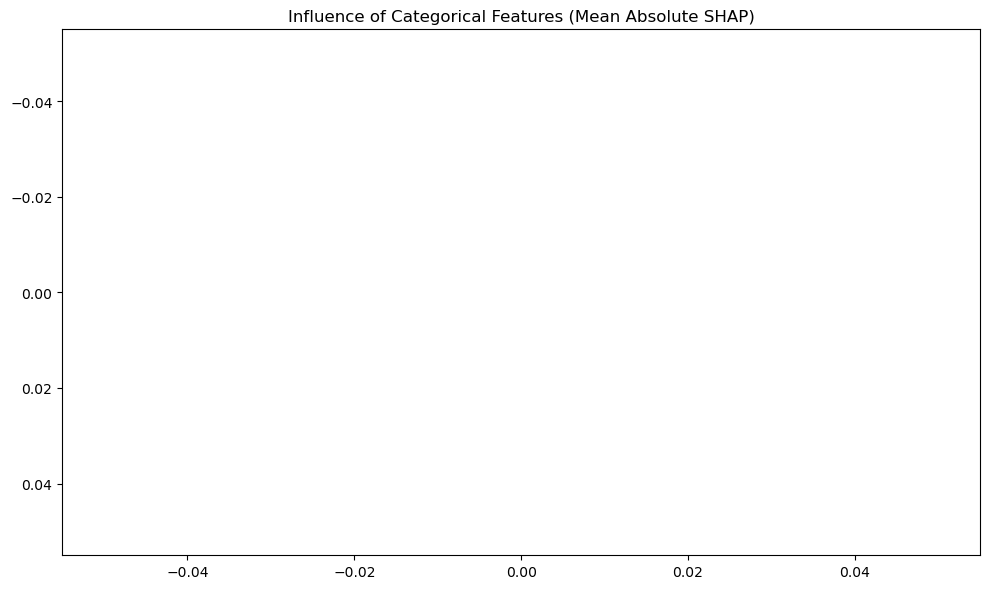

In [80]:
import numpy as np
import pandas as pd

# Compute mean absolute SHAP value for each feature (global importance)
mean_abs_shap = np.abs(shap_values[:, :-1]).mean(axis=0)

# Map to feature names
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "MeanAbsSHAP": mean_abs_shap,
    "IsCategorical": X_train.columns.isin(cat_features)
})

# Filter only categorical features
cat_importance = importance_df[importance_df["IsCategorical"]].sort_values(by="MeanAbsSHAP", ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(cat_importance['Feature'], cat_importance['MeanAbsSHAP'])
plt.title("Influence of Categorical Features (Mean Absolute SHAP)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [132]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder

# 1. Load dataset
df = pd.read_csv("ALL_I40_crash_data_updated.csv")

# 2. Filter out urban section based on longitude
df = df[~df["Longitude"].between(-88.877379, -88.734161)]

# 3. Define new binary target: Injurious (1) vs Property Damage (0)
df = df[df["Crash Type"].notnull()]
df["Injurious"] = df["Crash Type"].str.lower().apply(
    lambda x: 1 if "injury" in x or "fatal" in x or "serious injury" in x else 0
)

# 4. Use only tagged geospatial features
geo_features = [
    'Presence of guardrails',
    'Cable barriers',
    'Rumble strips',
    'Pavement condition',
    'Proximity to highway entrances and exits',
    'Urban vs. rural environment',
    'Surrounding natural features',
    'Shoulder type and width',
    'Posted speed limit',
    'Presence and type of median or divider',
    'Lane markings and signage visibility',
    'Nighttime lighting and visibility'
]

df = df.dropna(subset=geo_features)

X = df[geo_features].copy()
y = df["Injurious"]

# Identify categorical features (assume object dtype)
cat_features = X.select_dtypes(include='object').columns.tolist()

# 5. Encode categorical features for SMOTE using OrdinalEncoder
X_encoded = X.copy()
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_encoded[cat_features] = encoder.fit_transform(X_encoded[cat_features])

# 6. Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, stratify=y, test_size=0.3, random_state=42
)

# 7. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. Convert categorical features back to string for CatBoost
X_train_resampled[cat_features] = X_train_resampled[cat_features].astype(str)
X_test[cat_features] = X_test[cat_features].astype(str)  # for final prediction

# 9. Define CatBoost model
cat_indices = [X.columns.get_loc(col) for col in cat_features]
cat_model = CatBoostClassifier(
    cat_features=cat_indices,
    verbose=0,
    random_state=42
)

param_grid = {
    "depth": [4, 5, 6],
    "learning_rate": [0.01, 0.05],
    "iterations": [100, 200],
    "l2_leaf_reg": [1, 3, 5]
}

# 9. Define recall scorer for class 1
scorer = make_scorer(recall_score, pos_label=1)

# 10. Stratified cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 11. GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1
)

# 12. Train on resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# 13. Evaluate with tuned threshold
best_model = grid_search.best_estimator_

# Get predicted probabilities for class 1 (injurious)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Apply best threshold found from PR curve
threshold = 0.40
y_pred_thresh = (y_probs >= threshold).astype(int)

print("Best Parameters:", grid_search.best_params_)
print(f"\nUsing custom threshold = {threshold}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

Using custom threshold = 0.4

Confusion Matrix:
 [[ 53 137]
 [ 11  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.28      0.42       190
           1       0.23      0.79      0.36        53

    accuracy                           0.39       243
   macro avg       0.53      0.54      0.39       243
weighted avg       0.70      0.39      0.41       243



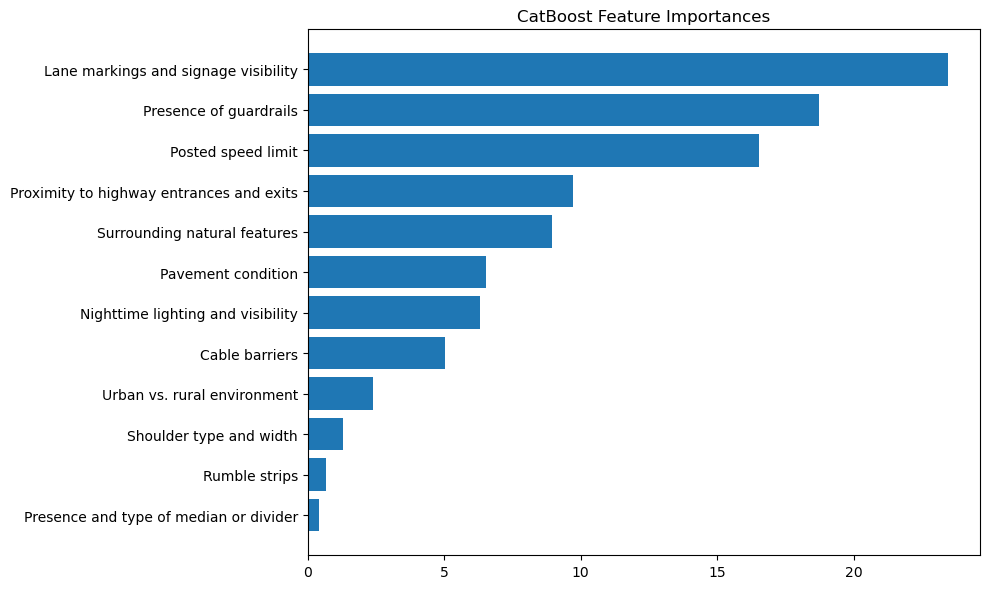

In [134]:
# Get feature importances (gain-based)
importances = best_model.get_feature_importance()
feature_names = X.columns

# Create a sorted DataFrame
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("CatBoost Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

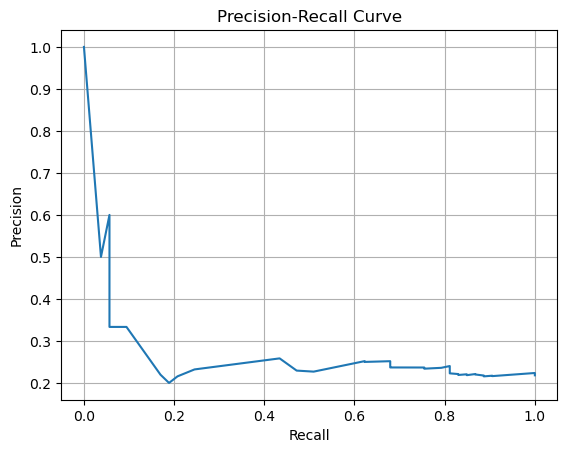

In [110]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

In [128]:
from sklearn.metrics import precision_recall_curve

y_probs = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

best_idx = f1_scores.argmax()
print(f"Best F1 threshold: {thresholds[best_idx]:.2f}")
print(f"Precision: {precision[best_idx]:.2f}, Recall: {recall[best_idx]:.2f}, F1: {f1_scores[best_idx]:.2f}")

# Apply custom threshold
y_pred_custom = (y_probs >= thresholds[best_idx]).astype(int)

Best F1 threshold: 0.48
Precision: 0.22, Recall: 1.00, F1: 0.36


In [136]:
df.to_csv("rural I-40 Madison and Henderson crashes.csv", index=False)


In [142]:
import pandas as pd
from catboost import CatBoostClassifier
import numpy as np

# Load data and model
df = pd.read_csv("rural I-40 Madison and Henderson crashes.csv")
best_model = CatBoostClassifier()
best_model.load_model("catboost_best_injurious_model.cbm")

# Ensure injurious flag is present
df["Injurious"] = df["Crash Type"].str.lower().apply(
    lambda x: 1 if "injury" in x or "fatal" in x or "serious injury" in x else 0
)

# Define features
geo_features = [
    'Presence of guardrails',
    'Cable barriers',
    'Rumble strips',
    'Pavement condition',
    'Proximity to highway entrances and exits',
    'Urban vs. rural environment',
    'Surrounding natural features',
    'Shoulder type and width',
    'Posted speed limit',
    'Presence and type of median or divider',
    'Lane markings and signage visibility',
    'Nighttime lighting and visibility'
]

# Filter data for the target segment
segment_df = df[df["Longitude"].between(-88.678, -88.612)].copy()
segment_df = segment_df.dropna(subset=geo_features)

# Prepare data for prediction
X_before = segment_df[geo_features].copy()

# Ensure categorical columns are strings (if needed)
cat_features = X_before.select_dtypes(include='object').columns.tolist()
X_before[cat_features] = X_before[cat_features].astype(str)

# Predict probabilities and use custom threshold
y_probs_before = best_model.predict_proba(X_before)[:, 1]
y_pred_before = (y_probs_before >= 0.4).astype(int)
predicted_injuries_before = y_pred_before.sum()

# Simulate guardrail intervention
X_after = X_before.copy()
X_after["Presence of guardrails"] = 1

# Predict again with guardrails
y_probs_after = best_model.predict_proba(X_after)[:, 1]
y_pred_after = (y_probs_after >= 0.4).astype(int)
predicted_injuries_after = y_pred_after.sum()

# Compare results
print("Guardrail Intervention Test on Segment (-88.678, -88.612)")
print("----------------------------------------------------------")
print(f"Total Crashes in Segment: {len(X_before)}")
print(f"Predicted Injurious Crashes BEFORE Intervention: {predicted_injuries_before}")
print(f"Predicted Injurious Crashes AFTER Intervention:  {predicted_injuries_after}")
print(f"Estimated Reduction: {predicted_injuries_before - predicted_injuries_after}")


Guardrail Intervention Test on Segment (-88.678, -88.612)
----------------------------------------------------------
Total Crashes in Segment: 75
Predicted Injurious Crashes BEFORE Intervention: 75
Predicted Injurious Crashes AFTER Intervention:  75
Estimated Reduction: 0


In [144]:
actual_injury_rate = segment_df["Injurious"].mean()
print(f"Observed injury rate in this segment: {actual_injury_rate:.2f}")

Observed injury rate in this segment: 0.32


In [150]:
import pandas as pd
import numpy as np

# Define segment range
lon_min, lon_max = -88.678, -88.612

# Filter dataset to the segment of interest
segment_df = df[df["Longitude"].between(lon_min, lon_max)].copy()
print(f"Total crashes in segment: {len(segment_df)}")

# Required feature list
geo_features = [
    'Presence of guardrails',
    'Cable barriers',
    'Rumble strips',
    'Pavement condition',
    'Proximity to highway entrances and exits',
    'Urban vs. rural environment',
    'Surrounding natural features',
    'Shoulder type and width',
    'Posted speed limit',
    'Presence and type of median or divider',
    'Lane markings and signage visibility',
    'Nighttime lighting and visibility'
]

# Drop missing values
segment_df = segment_df.dropna(subset=geo_features)

# Prepare features for pre-intervention prediction
X_before = segment_df[geo_features].copy()

# Convert categorical features to strings
cat_features = X_before.select_dtypes(include='object').columns.tolist()
X_before[cat_features] = X_before[cat_features].astype(str)

# Predict probabilities and binary outcomes before intervention
y_probs_before = best_model.predict_proba(X_before)[:, 1]
y_pred_before = (y_probs_before >= 0.4).astype(int)
num_injurious_before = y_pred_before.sum()

# Apply both interventions
X_after = X_before.copy()
X_after["Lane markings and signage visibility"] = "4"
X_after["Presence of guardrails"] = "2"

# Predict probabilities and binary outcomes after intervention
y_probs_after = best_model.predict_proba(X_after)[:, 1]
y_pred_after = (y_probs_after >= 0.4).astype(int)
num_injurious_after = y_pred_after.sum()

# Print comparison
print("\nCombined Intervention Test: Lane Markings + Guardrails")
print("--------------------------------------------------------")
print(f"Total Crashes in Segment: {len(X_after)}")
print(f"Predicted Injurious Crashes BEFORE Intervention: {num_injurious_before}")
print(f"Predicted Injurious Crashes AFTER Intervention:  {num_injurious_after}")
print(f"Estimated Reduction: {num_injurious_before - num_injurious_after}")


Total crashes in segment: 75

Combined Intervention Test: Lane Markings + Guardrails
--------------------------------------------------------
Total Crashes in Segment: 75
Predicted Injurious Crashes BEFORE Intervention: 75
Predicted Injurious Crashes AFTER Intervention:  75
Estimated Reduction: 0


In [152]:
before = model.predict(segment_features)
after = model.predict(segment_features_with_intervention)

NameError: name 'segment_features' is not defined